
## Exercise 2: Univariate Selection (ANOVA F-Value)

**Problem Description:**  
Rank features by how well they distinguish classes via ANOVA F-value.

**Solution Overview:**  
Use `SelectKBest(f_classif)` to compute F-scores, vary _k_, and plot results.



In [24]:
# 2.1 Setup
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [25]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [26]:
# 2.2 Compute F-scores and select top k
def run_anova(k):
  selector = SelectKBest(score_func=f_classif, k=k)
  X_k = selector.fit_transform(X, y)
  df = pd.DataFrame({'feature': X.columns,'F_score': selector.scores_}).sort_values('F_score', ascending=False)
  print(f"\nTop {k} features by ANOVA F-value:\n", df.head(k))
  return df


Top 1 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182


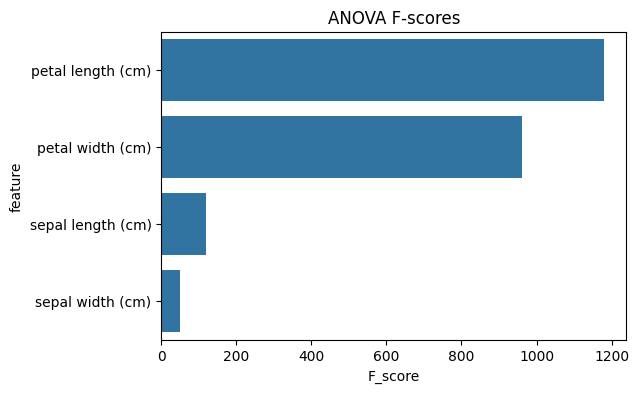


Top 2 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147


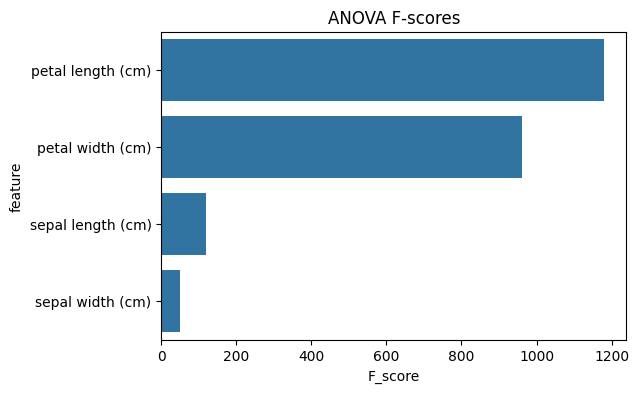


Top 3 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502


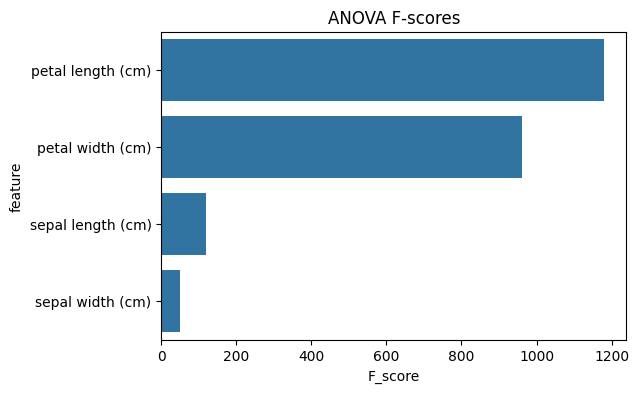


Top 4 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502
1   sepal width (cm)    49.160040


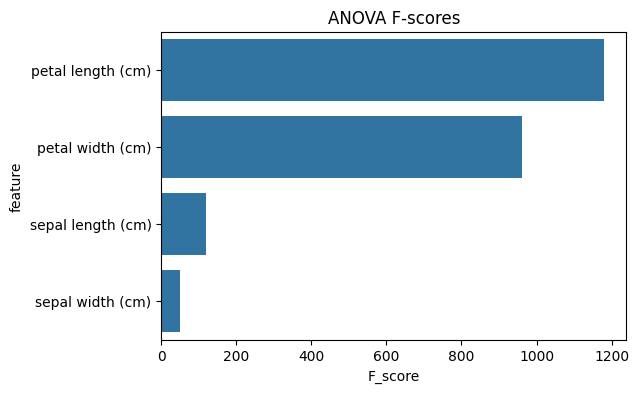

In [27]:
# 2.3 Try k = 1, 2, 3, 4 and plot
for k in [1, 2, 3, 4]:
  df_anova = run_anova(k)
  plt.figure(figsize=(6,4))
  sns.barplot(x='F_score', y='feature', data=df_anova)
  plt.title('ANOVA F-scores')
  plt.show()

# 2.3 Analysis
Interpret the meaning of the F-score for each feature.

Try k = 1, 2, 4 and discuss stability of rankings.

Visualize F-scores with a horizontal bar plot.

# Exercise 2: ANOVA F-Value
## Analysis to Include in Code

In [31]:
# 1. Score Table
anova_df = run_anova(k=4)
display(anova_df.style.background_gradient('Reds', subset=['F_score']))



Top 4 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502
1   sepal width (cm)    49.160040


,feature,F_score
2,petal length (cm),1180.161182
3,petal width (cm),960.007147
0,sepal length (cm),119.264502
1,sepal width (cm),49.160040


In [32]:
# Ranking Stability
stability = {}
for k in [1,2,3,4]:
    stability[k] = list(run_anova(k)['feature'][:k])
print("Top-k stability:", stability)



Top 1 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182

Top 2 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147

Top 3 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502

Top 4 features by ANOVA F-value:
              feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502
1   sepal width (cm)    49.160040
Top-k stability: {1: ['petal length (cm)'], 2: ['petal length (cm)', 'petal width (cm)'], 3: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)'], 4: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']}


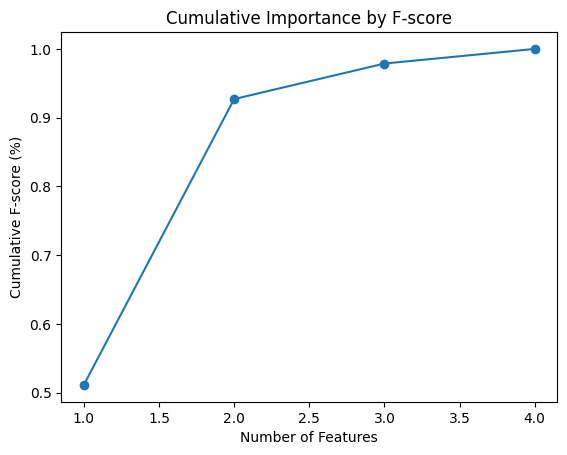

In [33]:
# Cumulative Explained Variance (approximate)
cum = anova_df['F_score'].cumsum() / anova_df['F_score'].sum()
plt.plot(range(1,len(cum)+1), cum, marker='o')
plt.xlabel("Number of Features"); plt.ylabel("Cumulative F-score (%)")
plt.title("Cumulative Importance by F-score")
plt.show()
